In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\\Users\\KANISHKA SHARMA\\Downloads\\archive (3)\\diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

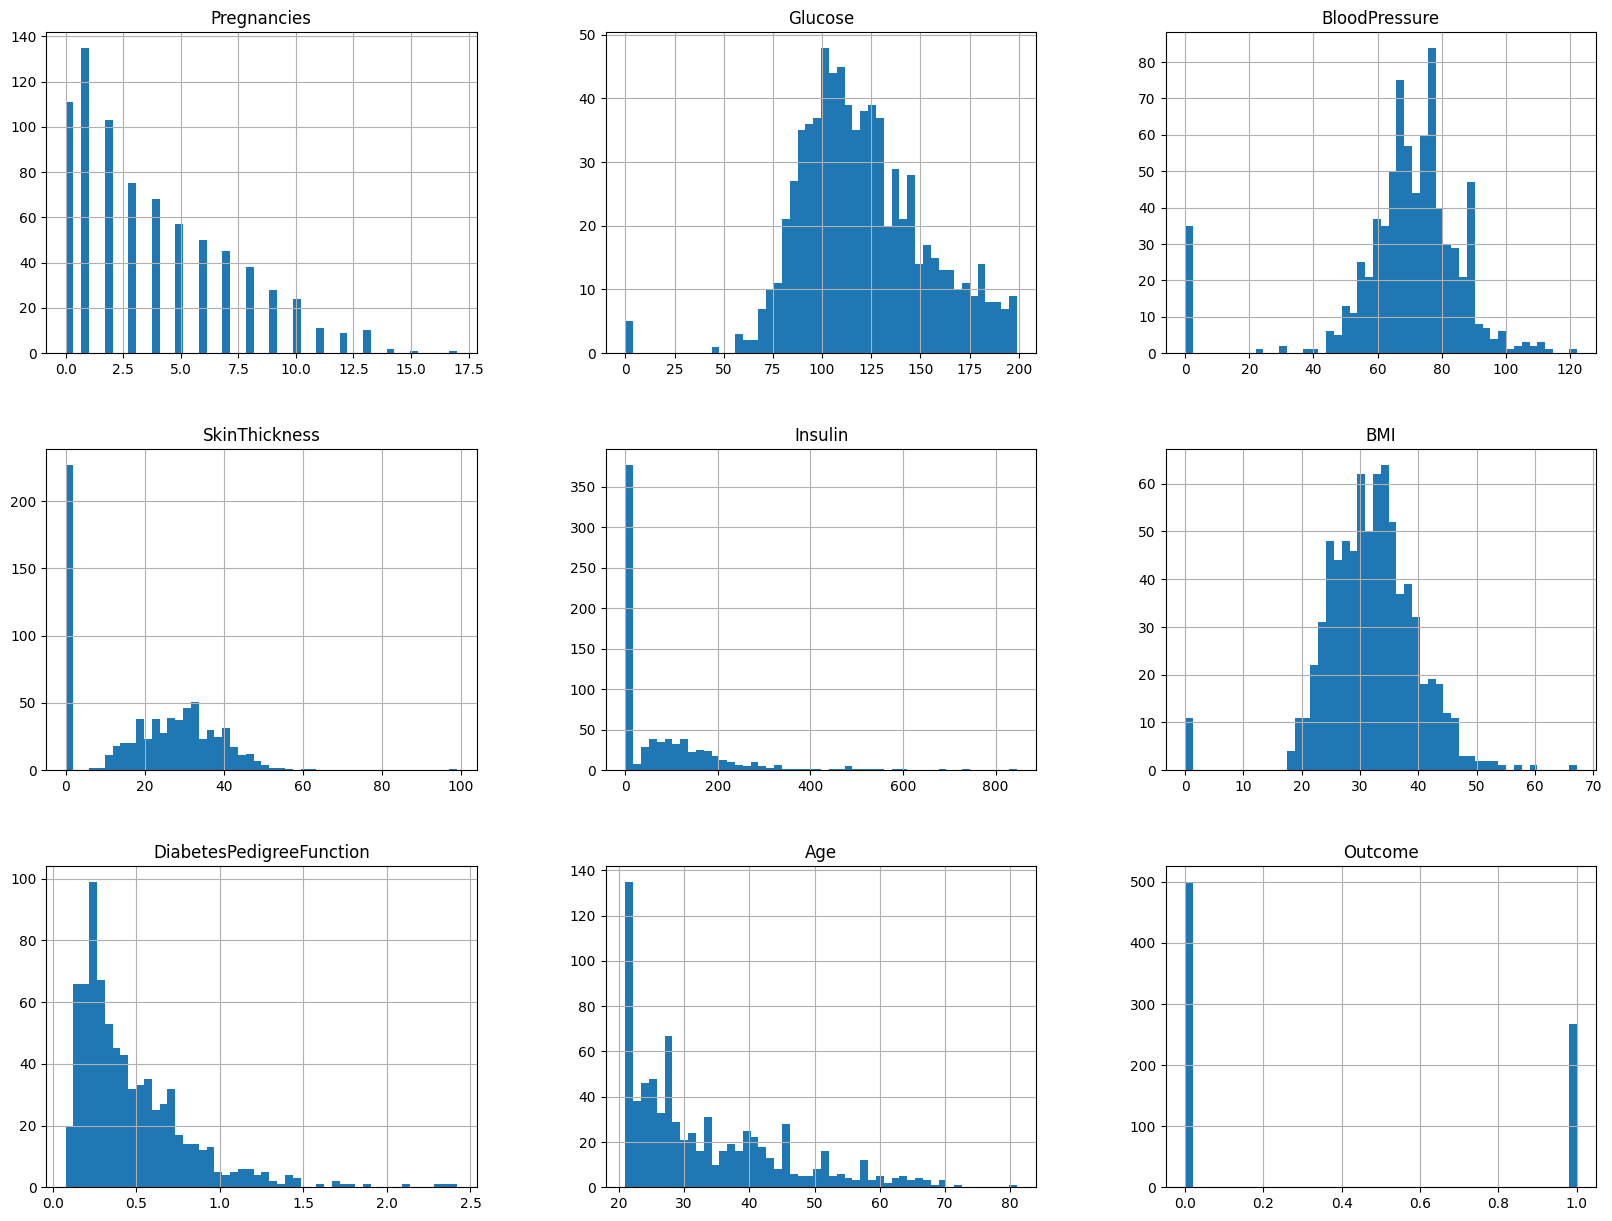

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))

In [7]:
#from the figure we can see that bmi,skinthickness,bp,age cannot be zero ,hence we can conclude that they are missing values disguised as zeros
zero_cols=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
(data[zero_cols]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [8]:
#lets us fill the missing values with the median values
data[zero_cols]=data[zero_cols].replace(0,np.nan)
data[zero_cols]=data[zero_cols].fillna(data[zero_cols].median())

In [9]:
(data[zero_cols]==0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [10]:
#now let us build intuition using correlation 
corr=data.corr()
corr["Outcome"].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

In [11]:
#Let us think that would making a new feature help us or not, Glucose and Bmi together can help us to find Metabolic_risk_
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[["Glucose_scaled","BMI_Scaled"]]=scaler.fit_transform(data[["Glucose","BMI"]])


In [12]:
#now we will create metablic risk,as we can say that glucose is better predictor than BMI we will assign more weight to it
data["Metabolic_risk"]=(0.6*data["Glucose"]+0.4*data["BMI"])

In [13]:
# now we will see target inbalance
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
data.Outcome.value_counts(normalize=True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [15]:
new_corr=data.corr()
new_corr["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Metabolic_risk              0.516471
Glucose_scaled              0.492782
Glucose                     0.492782
BMI_Scaled                  0.312038
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Glucose_scaled            768 non-null    float64
 10  BMI_Scaled                768 non-null    float64
 11  Metabolic_risk            768 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 72.1 KB


In [17]:
#Important points we can conclude after the EDA analysis
#1.Glucose and BMI are most important indicators 
#2.The dataset had null values disguised as zeros
#3 The feature we engineered using BMI and Glucose gives us a better Corealtion value
#4.There is inbalance in Target class(As the dataset is related to medical field the presence of no. of False Negatives must be reduced)